# OLS Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [3]:
df1=pd.read_excel('Trucking.xlsx')
df1

,Driving Assignment,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5, 1.0, 'Simple Linear Regression with Miles Travelled')

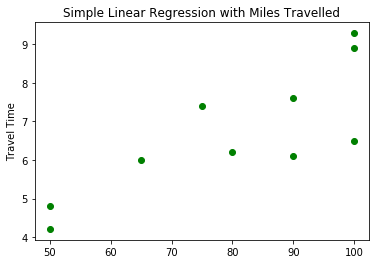

In [4]:
plt.scatter(df1['x1'],df1['travel_time'],color='green')
plt.ylabel('Travel Time')
plt.title('Simple Linear Regression with Miles Travelled')

Text(0.5, 1.0, 'Simple Linear Regression with number of deliveries')

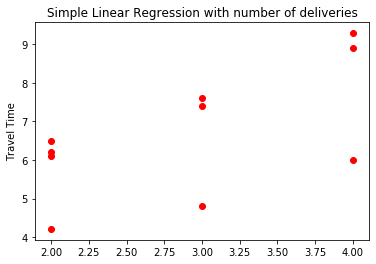

In [7]:
plt.scatter(df1['n_of_deliveries'],df1['travel_time'],color='red')
plt.ylabel('Travel Time')
plt.title('Simple Linear Regression with number of deliveries')

Text(0.5, 0, 'x1 in green and x2 in red')

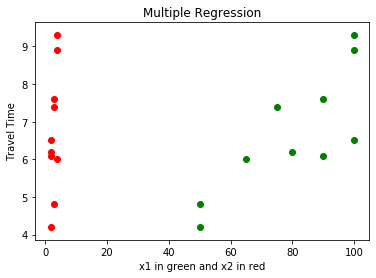

In [8]:
plt.scatter(df1['x1'],df1['travel_time'],color='green')
plt.scatter(df1['n_of_deliveries'],df1['travel_time'],color='red')
plt.ylabel('Travel Time')
plt.title('Multiple Regression')
plt.xlabel('x1 in green and x2 in red')

In [10]:
reg1=ols(formula="travel_time~x1",data=df1)
Fit1=reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 05 Jan 2020   Prob (F-statistic):            0.00408
Time:                        10:12:13   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

C:\Users\A609272\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [12]:
model=ols(formula="travel_time~x1+n_of_deliveries",data=df1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           0.000276
Time:                        10:15:57   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(anova_lm(Fit1))

           df     sum_sq    mean_sq          F   PR(>F)
x1        1.0  15.871304  15.871304  15.814578  0.00408
Residual  8.0   8.028696   1.003587        NaN      NaN


In [15]:
print(anova_lm(model,typ=1))

                  df     sum_sq    mean_sq          F    PR(>F)
x1               1.0  15.871304  15.871304  48.315660  0.000221
n_of_deliveries  1.0   5.729252   5.729252  17.441075  0.004157
Residual         7.0   2.299443   0.328492        NaN       NaN


# Lec 34,F test and T test,Regression Approach with ANOVA

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.formula.api as smf

In [19]:
data=pd.read_excel('chemitech.xlsx')
data

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [22]:
data_r=pd.melt(data.reset_index(),id_vars=['index'],value_vars=['A','B','C'])
data_r.columns=['index','treatments','value']
data_r


,index,treatments,value
0,0,A,58
1,1,A,64
2,2,A,55
3,3,A,66
4,4,A,67
5,0,B,58
6,1,B,69
7,2,B,71
8,3,B,64
9,4,B,68


In [23]:
model=ols('value~C(treatments)', data=data_r).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


In [24]:
just_dummies=pd.get_dummies(data_r['treatments'])
just_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [25]:
step_1=pd.concat([data_r,just_dummies],axis=1)
step_1.drop(['treatments','C'],inplace=True,axis=1)
step_1

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [28]:
result=sm.OLS(step_1['value'],sm.add_constant(step_1[['A','B']])).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Sun, 05 Jan 2020   Prob (F-statistic):            0.00382
Time:                        12:24:48   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0000      2.380     21.844      0.0

C:\Users\A609272\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\A609272\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
